# **Pytorch CNN MNIST**

## **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.model_selection import train_test_split

## **Working with data**

### **Load data**

In [2]:
path = "D://admp_northallerton/my_machine_learning/datasets/MNIST_dataset.csv"

data = pd.read_csv(path)

### **Preprocessing**

In [3]:
X = data.drop(columns=["label"]).values
y = data["label"].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [5]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (29400, 784)
y_train shape: (29400,)
X_test shape: (12600, 784)
y_test shape: (12600,)


### **Making dataset class**

In [6]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, X, y, transform=None):
        self.X = torch.tensor(X)
        self.y = torch.tensor(y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [7]:
batch_size = 64

### **Making dataloaders**

In [8]:
train_data = Dataset(X_train, y_train)
test_data = Dataset(X_test, y_test)

In [9]:
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, drop_last=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True, drop_last=True)

## **Our NN class**

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=3),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )

        self.layers = nn.Sequential(
            nn.Linear(400, 120),
            nn.ReLU(),
            nn.Linear(120, 84),
            nn.ReLU(),
            nn.Linear(84, 10)
        )

    def forward(self, x):
        x = x.type(torch.float32)
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.layers(x)

        return x

## **Model**

In [11]:
net = Net()

## **Train**

In [12]:
epochs = 10
learning_rate = 0.001

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters(), lr=learning_rate)

In [14]:
loaders = {
    "train": train_dataloader,
    "test": test_dataloader
}

In [15]:
accuracy = {"train": [], "test": []}

for epoch in range(epochs):
    epoch_correct = 0
    epoch_all = 0

    for k, dataloader in loaders.items():
        for X_batch, y_batch in dataloader:
            X_batch = X_batch.view(batch_size, 1, 28, 28)
            
            if k == "train":
                net.train()
                out = net.forward(X_batch)
                loss = criterion(out, y_batch)
                optimizer.zero_grad()  
                loss.backward()
                optimizer.step()
            else:
                net.eval()

                with torch.no_grad():  
                    out = net.forward(X_batch)

            predictions = out.argmax(-1)
            correct = torch.tensor(y_batch[y_batch==predictions].size())
            all = batch_size
            epoch_correct += correct.item()
            epoch_all += all

        if k == "train":
            print(f"Epoch: {epoch+1}")
        print(f"Loader: {k}. Accuracy: {epoch_correct/epoch_all}")
        
        accuracy[k].append(epoch_correct/epoch_all)

Epoch: 1
Loader: train. Accuracy: 0.9065563725490197
Loader: test. Accuracy: 0.9216364503816794
Epoch: 2
Loader: train. Accuracy: 0.9707244008714597
Loader: test. Accuracy: 0.9705152671755726
Epoch: 3
Loader: train. Accuracy: 0.978792211328976
Loader: test. Accuracy: 0.976574427480916
Epoch: 4
Loader: train. Accuracy: 0.9850898692810458
Loader: test. Accuracy: 0.981679389312977
Epoch: 5
Loader: train. Accuracy: 0.9863834422657952
Loader: test. Accuracy: 0.9838263358778626
Epoch: 6
Loader: train. Accuracy: 0.987166394335512
Loader: test. Accuracy: 0.9839456106870229
Epoch: 7
Loader: train. Accuracy: 0.9894131263616558
Loader: test. Accuracy: 0.9869990458015268
Epoch: 8
Loader: train. Accuracy: 0.990025871459695
Loader: test. Accuracy: 0.9849475190839695
Epoch: 9
Loader: train. Accuracy: 0.9916598583877996
Loader: test. Accuracy: 0.9873091603053435
Epoch: 10
Loader: train. Accuracy: 0.9925108932461874
Loader: test. Accuracy: 0.9889312977099237


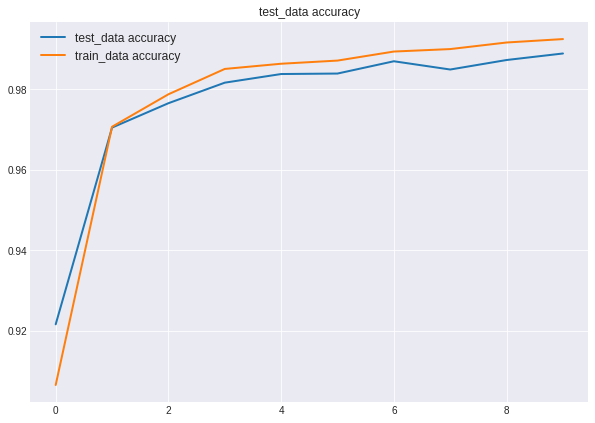

In [16]:
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(10, 7))

plt.title("test_data accuracy")
plt.plot(range(epochs), accuracy["test"], linewidth=2, label="test_data accuracy")
plt.plot(range(epochs), accuracy["train"], linewidth=2, label="train_data accuracy")
plt.legend(fontsize=12)
plt.show()

## **Test**

In [17]:
test_img = X_test[113]
test_label = y_test[113]

test_img_tensor = torch.tensor(test_img)
test_img_tensor = test_img_tensor.type(torch.float32)
test_img_tensor = test_img_tensor.view(1, 1, 28, 28)

net.eval()

prediction = net.forward(test_img_tensor).argmax(-1)[0]

label: 7
prediction: 7


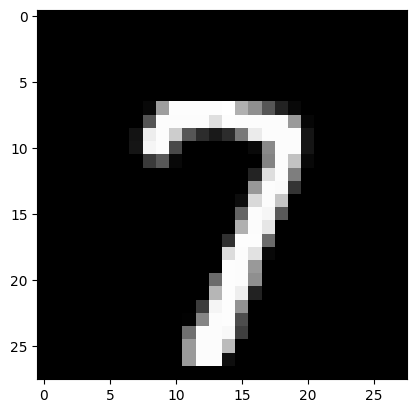

In [18]:
print(f"label: {test_label}")
print(f"prediction: {prediction}")

plt.style.use("default")
plt.gray()

current_image = test_img.reshape((28, 28))
plt.imshow(current_image)

plt.show()